# NLP Tutorial - CS7180: Gen. AI - Week 3

# Part 1: The AI approach

In [46]:
%pip install -q nltk sentence_transformers
%pip install -q numpy pandas matplotlib seaborn scikit-learn sentence_transformers
%pip install -q torch tf-keras transformers
import nltk
nltk.download('punkt', quiet=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


True

## 1.1 Tokenization with NLTK

In [23]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Word tokenization
text = "Best jumbo muffins for only $2.50 in Seattle. Please get me... uh, two of them. \n\nThanks!"
w_tokens = word_tokenize(text)
print(w_tokens)

# Sentence tokenization
s_tokens = sent_tokenize(text)
print(s_tokens)

['Best', 'jumbo', 'muffins', 'for', 'only', '$', '2.50', 'in', 'Seattle', '.', 'Please', 'get', 'me', '...', 'uh', ',', 'two', 'of', 'them', '.', 'Thanks', '!']
['Best jumbo muffins for only $2.50 in Seattle.', 'Please get me... uh, two of them.', 'Thanks!']


In [24]:
# Define a list of RGB colors for background highlighting
colors_list = [
    "255;219;172",  # Light peach
    "144;238;144",  # Light green
    "173;216;230",  # Light blue
    "255;192;203",  # Pink
    "221;160;221",  # Plum
    "255;218;185",  # Peach puff
    "176;224;230",  # Powder blue
    "255;255;224"   # Light yellow
]

def show_tokens(tokens):
    formatted_output = ''
    
    for idx, token in enumerate(tokens):
        rgb = colors_list[idx % len(colors_list)].split(';')
        r, g, b = map(int, rgb)
        # Add black text color (30m) to the formatting
        formatted_output += f'\033[30m\033[48;2;{r};{g};{b}m{token}\033[0m '
    
    print(formatted_output)

# Test the function with the existing text
show_tokens(w_tokens)

# Test the function with the existing text
show_tokens(s_tokens)


Best jumbo muffins for only $ 2.50 in Seattle . Please get me ... uh , two of them . Thanks ! 
Best jumbo muffins for only $2.50 in Seattle. Please get me... uh, two of them. Thanks! 


## 1.2 Context-Free-Grammar (CFG)

In [25]:
import nltk
from nltk import CFG, ChartParser, Tree
from nltk.tokenize import word_tokenize

# Define grammar
new_grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det Nom | Det N
Nom -> Adj N
VP -> V NP
Det -> 'the'
Adj -> 'little'
N -> 'bear' | 'moon'
V -> 'saw'
""")

# Create parser
new_parser = nltk.ChartParser(new_grammar)

# Check sentences
test_sentences = [
    "the little bear saw the moon",  # valid
    "the bear saw the moon",  # valid
    "the moon saw the little bear",  # valid
    "the bear saw moon",  # invalid
    "bear saw the moon",  # invalid
]

for sentence in test_sentences:
    print(f"Checking: {sentence}")
    try:
        tokens = word_tokenize(sentence)
        parses = list(new_parser.parse(tokens))
        if parses:
            print("Grammatically correct!")
            print("\nParse tree:")
            for tree in parses:
                Tree.pretty_print(tree)
        else:
            print("NOT grammatically correct.")
    except Exception as e:
        print(f"Error: {e}")
    print("-" * 30)


Checking: the little bear saw the moon
Grammatically correct!

Parse tree:
                S                   
       _________|________            
      NP                 VP         
  ____|_____          ___|___        
 |         Nom       |       NP     
 |     _____|___     |    ___|___    
Det  Adj        N    V  Det      N  
 |    |         |    |   |       |   
the little     bear saw the     moon

------------------------------
Checking: the bear saw the moon
Grammatically correct!

Parse tree:
              S              
      ________|___            
     |            VP         
     |         ___|___        
     NP       |       NP     
  ___|___     |    ___|___    
Det      N    V  Det      N  
 |       |    |   |       |   
the     bear saw the     moon

------------------------------
Checking: the moon saw the little bear
Grammatically correct!

Parse tree:
              S                         
      ________|_______                   
     |                VP

## 1.3 Multiple Parse Trees & Language Amboguity

In [26]:
import nltk
from nltk.tree import Tree

# Define a CFG grammar
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

# Create a parser
text = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(grammar)

# Parse and display all trees
for tree in parser.parse(text):
    print("Parse Tree:")
    Tree.pretty_print(tree)
    print("\n" + "="*50 + "\n")
    # Save parse trees to a text file with nice formatting
    with open('parse_trees.txt', 'w') as f:
        for i, tree in enumerate(parser.parse(text), 1):
            f.write(f"Parse Tree #{i}:\n")
            f.write(str(tree))
            f.write("\n\n" + "="*50 + "\n\n")
    

Parse Tree:
     S                                       
  ___|______________                          
 |                  VP                       
 |         _________|__________               
 |        VP                   PP            
 |    ____|___              ___|___           
 |   |        NP           |       NP        
 |   |     ___|_____       |    ___|_____     
 NP  V   Det        N      P  Det        N   
 |   |    |         |      |   |         |    
 I  shot  an     elephant  in  my     pajamas



Parse Tree:
     S                                   
  ___|__________                          
 |              VP                       
 |    __________|______                   
 |   |                 NP                
 |   |     ____________|___               
 |   |    |     |          PP            
 |   |    |     |       ___|___           
 |   |    |     |      |       NP        
 |   |    |     |      |    ___|_____     
 NP  V   Det    N      P  Det        

## 1.4 Word Sense Disambiguation with WordNet

In [16]:
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt', quiet=True)

True

In [27]:
import nltk
from nltk.corpus import wordnet as wn
from nltk import wsd
from nltk.tokenize import word_tokenize

# Disambiguate "bear"
word = "bear"
synsets_trout = wn.synsets(word)
for synset in synsets_trout:
    print("- " + synset.definition())

sentence = "The little bear saw the moon!"
sentence_tokenized = word_tokenize(sentence)
synset_inferred = wsd.lesk(sentence_tokenized, "bear")
print("\n In ["+sentence+ "]: The word "+word+" means " + synset_inferred.definition())
    

- massive plantigrade carnivorous or omnivorous mammals with long shaggy coats and strong claws
- an investor with a pessimistic market outlook; an investor who expects prices to fall and so sells now in order to buy later at a lower price
- have
- cause to be born
- put up with something or somebody unpleasant
- move while holding up or supporting
- bring forth,
- take on as one's own the expenses or debts of another person
- contain or hold; have within
- bring in
- have on one's person
- behave in a certain manner
- have rightfully; of rights, titles, and offices
- support or hold in a certain manner
- be pregnant with

 In [The little bear saw the moon!]: The word bear means take on as one's own the expenses or debts of another person


# 2 The ML Appraoch

## 2.1 Let's an article classification model

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Sample texts
texts = [
    "basketball is a team sport where we shoot a basketball",
    "football is a team sport where we score goals"
]
labels = [1, 0]  # 1 for positive, 0 for negative

# Vectorization
vectorizer = CountVectorizer(ngram_range=(1, 1))
vectorizer.fit(texts)
x = vectorizer.transform(texts)
print(x.todense())

# Logistic regression model
model = LogisticRegression()
model.fit(x, labels)
print(vectorizer.get_feature_names_out())
features = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a DataFrame to sort features by their coefficient magnitude
df_features = pd.DataFrame({'feature': features, 'coefficient': coefficients})
df_features['abs_coefficient'] = df_features['coefficient'].abs()
df_features_sorted = df_features.sort_values(by='abs_coefficient', ascending=False)

# Print sorted features
print(df_features_sorted[['feature', 'coefficient']])
    

[[2 0 0 1 0 1 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1]]
['basketball' 'football' 'goals' 'is' 'score' 'shoot' 'sport' 'team' 'we'
 'where']
      feature  coefficient
0  basketball     0.521313
5       shoot     0.260657
1    football    -0.260636
2       goals    -0.260636
4       score    -0.260636
3          is     0.000020
6       sport     0.000020
7        team     0.000020
8          we     0.000020
9       where     0.000020


This apprach to feature extraction is called Bag of Words (BoW). 

## 2.2 Extracting unique words

In [29]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from collections import Counter

# Download twitter samples
nltk.download('twitter_samples', quiet=True)

# Get all tweets
all_tweets = (
    twitter_samples.strings('positive_tweets.json') + 
    twitter_samples.strings('negative_tweets.json')
)

# Tokenize all tweets
all_words = []
for tweet in all_tweets:
    words = word_tokenize(tweet.lower())
    all_words.extend(words)

# Count unique words
unique_words = set(all_words)

print(f"Total number of words: {len(all_words)}")
print(f"Number of (features) unique words: {len(unique_words)}")

Total number of words: 159720
Number of (features) unique words: 21509


## 2.3 Removing Stopwords

In [30]:
from nltk.corpus import stopwords

# Download stop words if not already downloaded
nltk.download('stopwords', quiet=True)

# Get English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from unique_words
filtered_unique_words = unique_words - stop_words

print(f"Original number of unique words: {len(unique_words)}")
print(f"Number of unique words after removing stop words: {len(filtered_unique_words)}")

Original number of unique words: 21509
Number of unique words after removing stop words: 21367


### Printing some example Stopwords

In [31]:
from nltk.corpus import stopwords

# Download stop words if not already downloaded
nltk.download('stopwords', quiet=True)

# Get English stop words
stop_words = set(stopwords.words('english'))
print("First 10 stop words examples:", list(stop_words)[:10])
print("Last 10 stop words examples:", list(stop_words)[-10:])

# Remove stop words from unique_words
filtered_unique_words = unique_words - stop_words

print(f"Original number of unique words: {len(unique_words)}")
print(f"Number of unique words after removing stop words: {len(filtered_unique_words)}")

First 10 stop words examples: ['be', 'once', 'those', 'about', "that'll", "didn't", 'these', 'have', 'through', 'to']
Last 10 stop words examples: ['theirs', 'down', "don't", 'shouldn', 'ain', 'below', 'most', 'her', "haven't", 'is']
Original number of unique words: 21509
Number of unique words after removing stop words: 21367


## 2.4 Stemming or Lemmatization

In [32]:
# Initialize 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Apply stemming to unique words
stemmed_unique_words = {stemmer.stem(word.lower()) for word in filtered_unique_words}

print(f"Number of unique words before stemming: {len(filtered_unique_words)}")
print(f"Number of unique words after stemming: {len(stemmed_unique_words)}")


# Define words to be stemmed
words = ['Changing', 'Change', 'Changes', 'Changed']
# Initialize stemmer
stemmed_words = {stemmer.stem(word) for word in words}

print(f"Example set of words: {words}")
print(f"All collapsed to: {stemmed_words}")



Number of unique words before stemming: 21367
Number of unique words after stemming: 19407
Example set of words: ['Changing', 'Change', 'Changes', 'Changed']
All collapsed to: {'chang'}


## 2.5 BoW Extention (N-Grams)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
text = "I am feeling very happy!"

# Unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
unigram_vectorizer.fit([text])
print("Unigrams:", unigram_vectorizer.get_feature_names_out())

# Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_vectorizer.fit([text])
print("\nBigrams:", bigram_vectorizer.get_feature_names_out())

# Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_vectorizer.fit([text])
print("\nTrigrams:", trigram_vectorizer.get_feature_names_out())

# Show frequency counts
print("\nUnigram frequencies:", unigram_vectorizer.transform([text]).toarray()[0])
print("Bigram frequencies:", bigram_vectorizer.transform([text]).toarray()[0])
print("Trigram frequencies:", trigram_vectorizer.transform([text]).toarray()[0])

Unigrams: ['am' 'feeling' 'happy' 'very']

Bigrams: ['am feeling' 'feeling very' 'very happy']

Trigrams: ['am feeling very' 'feeling very happy']

Unigram frequencies: [1 1 1 1]
Bigram frequencies: [1 1 1]
Trigram frequencies: [1 1]


Number of unigram features: 20671
Number of unigram + bigram features: 43599
Number of unigram + bigram + trigram features: 66533
Number of unigram + bigram + trigram + fourgram features: 89466

Percentage increase from unigrams to bigrams: 110.9%
Percentage increase from unigrams to trigrams: 221.9%
Percentage increase from unigrams to fourgrams: 332.8%


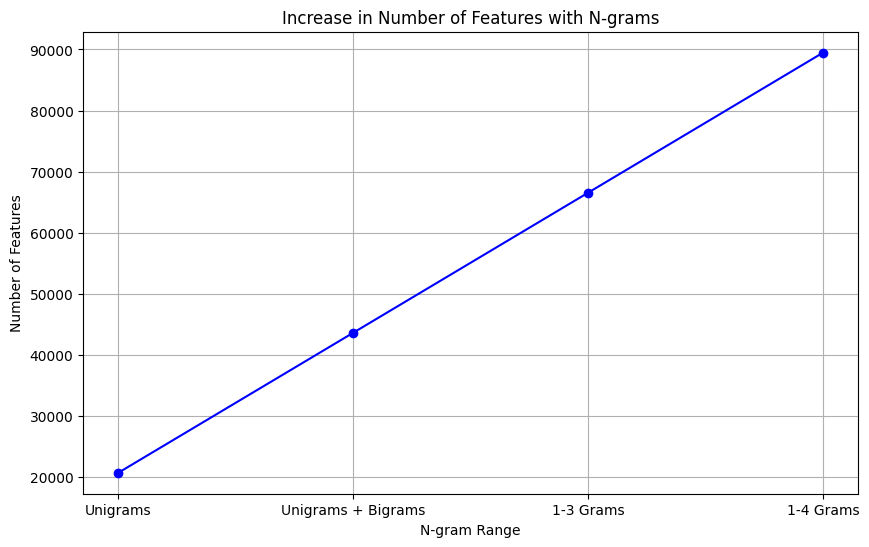

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Use stemmed words from tweets dataset
word = " ".join(filtered_unique_words)

# Create vectorizers for different n-gram ranges
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # includes both unigrams and bigrams
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))  # includes uni-, bi-, and trigrams
fourgram_vectorizer = CountVectorizer(ngram_range=(1, 4))  # includes uni-, bi-, tri-, and fourgrams

# Fit and get features for each n-gram range
unigram_features = unigram_vectorizer.fit([word]).get_feature_names_out()
bigram_features = bigram_vectorizer.fit([word]).get_feature_names_out()
trigram_features = trigram_vectorizer.fit([word]).get_feature_names_out()
fourgram_features = fourgram_vectorizer.fit([word]).get_feature_names_out()

# Print results
print(f"Number of unigram features: {len(unigram_features)}")
print(f"Number of unigram + bigram features: {len(bigram_features)}")
print(f"Number of unigram + bigram + trigram features: {len(trigram_features)}")
print(f"Number of unigram + bigram + trigram + fourgram features: {len(fourgram_features)}")

# Calculate percentage increase
pct_increase_bigram = (len(bigram_features) - len(unigram_features)) / len(unigram_features) * 100
pct_increase_trigram = (len(trigram_features) - len(unigram_features)) / len(unigram_features) * 100
pct_increase_fourgram = (len(fourgram_features) - len(unigram_features)) / len(unigram_features) * 100

print(f"\nPercentage increase from unigrams to bigrams: {pct_increase_bigram:.1f}%")
print(f"Percentage increase from unigrams to trigrams: {pct_increase_trigram:.1f}%")
print(f"Percentage increase from unigrams to fourgrams: {pct_increase_fourgram:.1f}%")

# Data for plotting
n_values = ['Unigrams', 'Unigrams + Bigrams', '1-3 Grams', '1-4 Grams']
feature_counts = [len(unigram_features), len(bigram_features), len(trigram_features), len(fourgram_features)]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(n_values, feature_counts, marker='o', linestyle='-', color='b')
plt.title('Increase in Number of Features with N-grams')
plt.xlabel('N-gram Range')
plt.ylabel('Number of Features')
plt.grid(True)
plt.show()

## 2.6 TF-IDF (a significant improvement)

IDF Values:
      Term       IDF
0      are  1.693147
1      cat  1.693147
2      dog  1.693147
3   locals  1.693147
4      log  1.693147
5      mat  1.693147
6       on  1.287682
7  playing  1.693147
8      sat  1.287682
9      the  1.000000


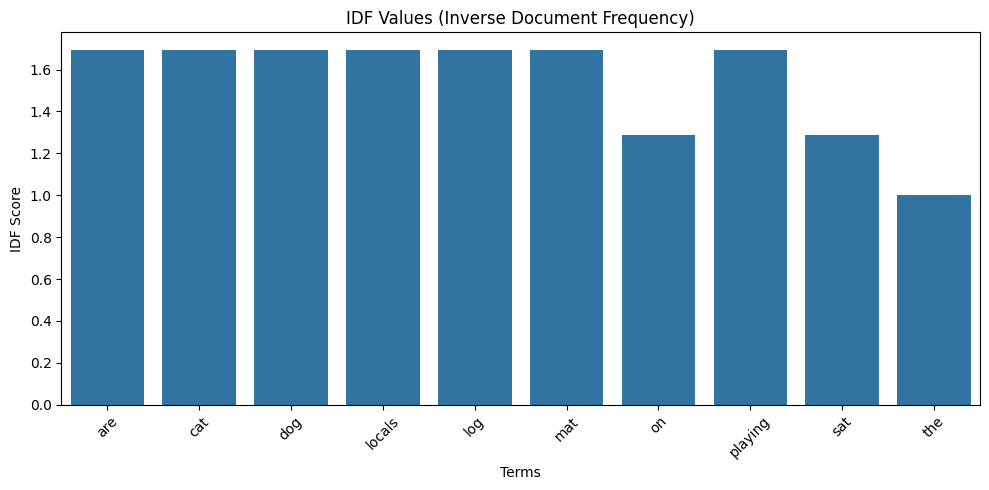

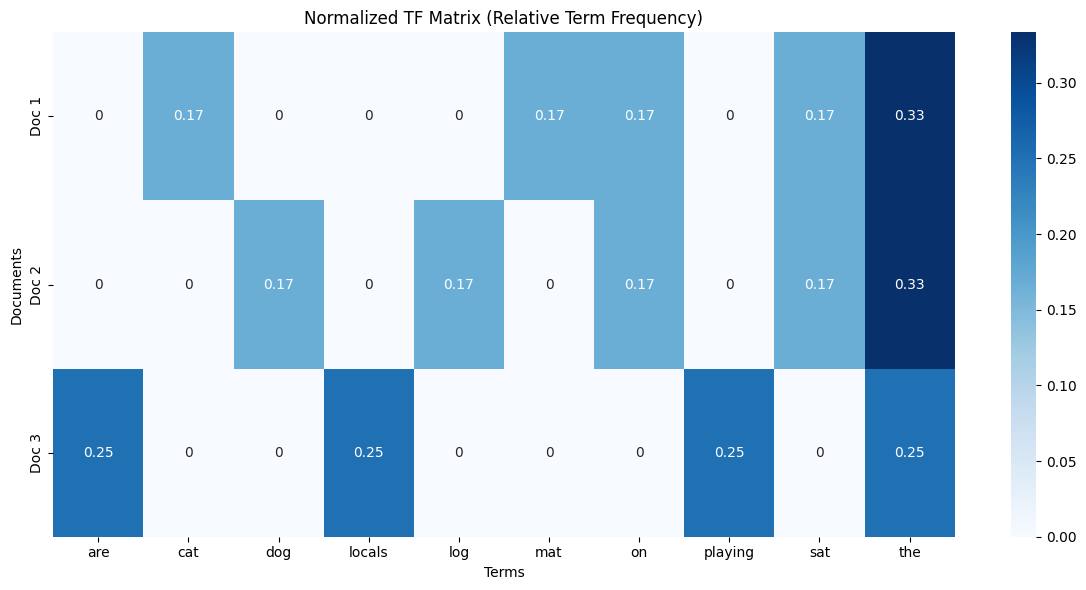

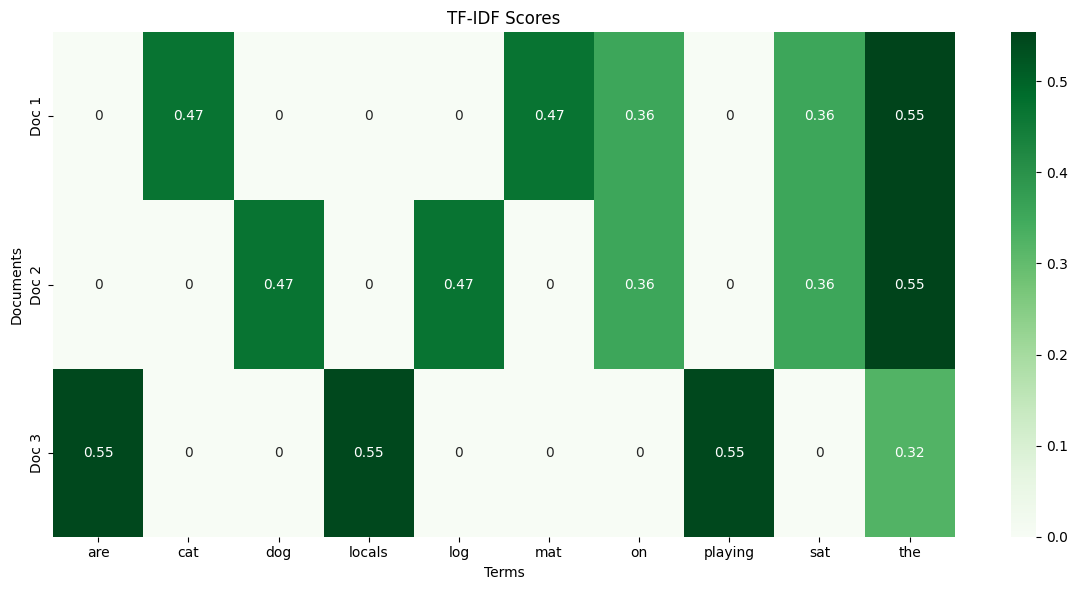

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example documents
documents = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "The locals are playing"
]

# Step 1: Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Extract Raw Term Frequencies (TF)
vectorizer_tf = TfidfVectorizer(use_idf=False, norm=None)
tf_matrix = vectorizer_tf.fit_transform(documents)
tf_raw = tf_matrix.toarray()  # Extract raw term frequency matrix

# Normalize TF for better visualization
tf_normalized = tf_raw / np.sum(tf_raw, axis=1, keepdims=True)

# Step 3: Extract IDF values
idf_values = vectorizer.idf_
feature_names = vectorizer.get_feature_names_out()

# Display IDF values
idf_df = pd.DataFrame({'Term': feature_names, 'IDF': idf_values})
print("IDF Values:")
print(idf_df)

# Step 4: Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Step 5: Visualizations

# Plot IDF values
plt.figure(figsize=(10, 5))
sns.barplot(x=idf_df['Term'], y=idf_df['IDF'])
plt.title("IDF Values (Inverse Document Frequency)")
plt.xlabel("Terms")
plt.ylabel("IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot normalized TF matrix
plt.figure(figsize=(12, 6))
sns.heatmap(tf_normalized, annot=True, cmap="Blues", xticklabels=feature_names, yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Normalized TF Matrix (Relative Term Frequency)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

# Plot TF-IDF matrix
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df, annot=True, cmap="Greens", xticklabels=feature_names, yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("TF-IDF Scores")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()



#### Stemming and Lemmatization

In [36]:

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Stemming
stemmer = PorterStemmer()
text = "The cats are sleeping. What are the dogs doing?"
tokens = word_tokenize(text)
tokens_stemmed = [stemmer.stem(token) for token in tokens]
print(tokens_stemmed)

# Lemmatization
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
print(tokens_lemmatized)
    

['the', 'cat', 'are', 'sleep', '.', 'what', 'are', 'the', 'dog', 'do', '?']
['The', 'cat', 'are', 'sleeping', '.', 'What', 'are', 'the', 'dog', 'doing', '?']


# Part 3. Embedding Space

## 3.1 Word Embedding 

A first example!

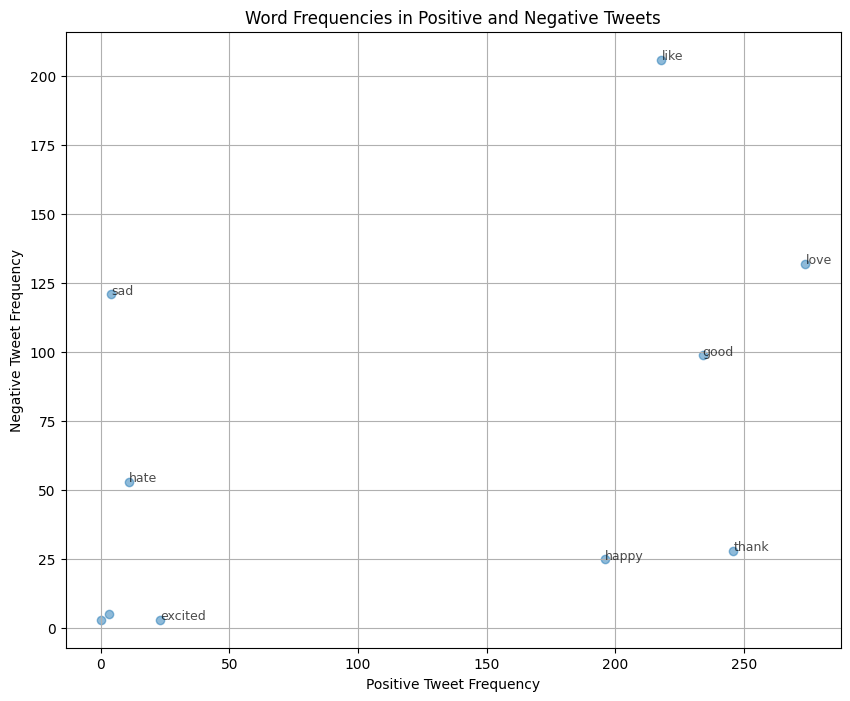

In [38]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from collections import defaultdict

import matplotlib.pyplot as plt

# Download twitter samples if not already downloaded
nltk.download('twitter_samples', quiet=True)

# Get positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Tokenize tweets and count word frequencies
freqs = defaultdict(int)
for tweet in positive_tweets:
    for word in word_tokenize(tweet.lower()):
        freqs[(word, 1)] += 1  # Positive word frequency

for tweet in negative_tweets:
    for word in word_tokenize(tweet.lower()):
        freqs[(word, 0)] += 1  # Negative word frequency


# Predefined subset of words to consider
words = ['happy', 'love', 'hate', 'sad', 'thank', 'angry', 'excited', 'worried', 'like', 'good']

# Calculate positive and negative frequencies for the predefined subset
positive_freqs = [freqs[(word, 1)] for word in words]
negative_freqs = [freqs[(word, 0)] for word in words]

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(positive_freqs, negative_freqs, alpha=0.5)
plt.title('Word Frequencies in Positive and Negative Tweets')
plt.xlabel('Positive Tweet Frequency')
plt.ylabel('Negative Tweet Frequency')

# Annotate some points for clarity
for i, word in enumerate(words):
    if positive_freqs[i] > 20 or negative_freqs[i] > 20:  # Annotate words with high frequency
        plt.annotate(word, (positive_freqs[i], negative_freqs[i]), fontsize=9, alpha=0.7)

plt.grid(True)
plt.show()

Second Example!

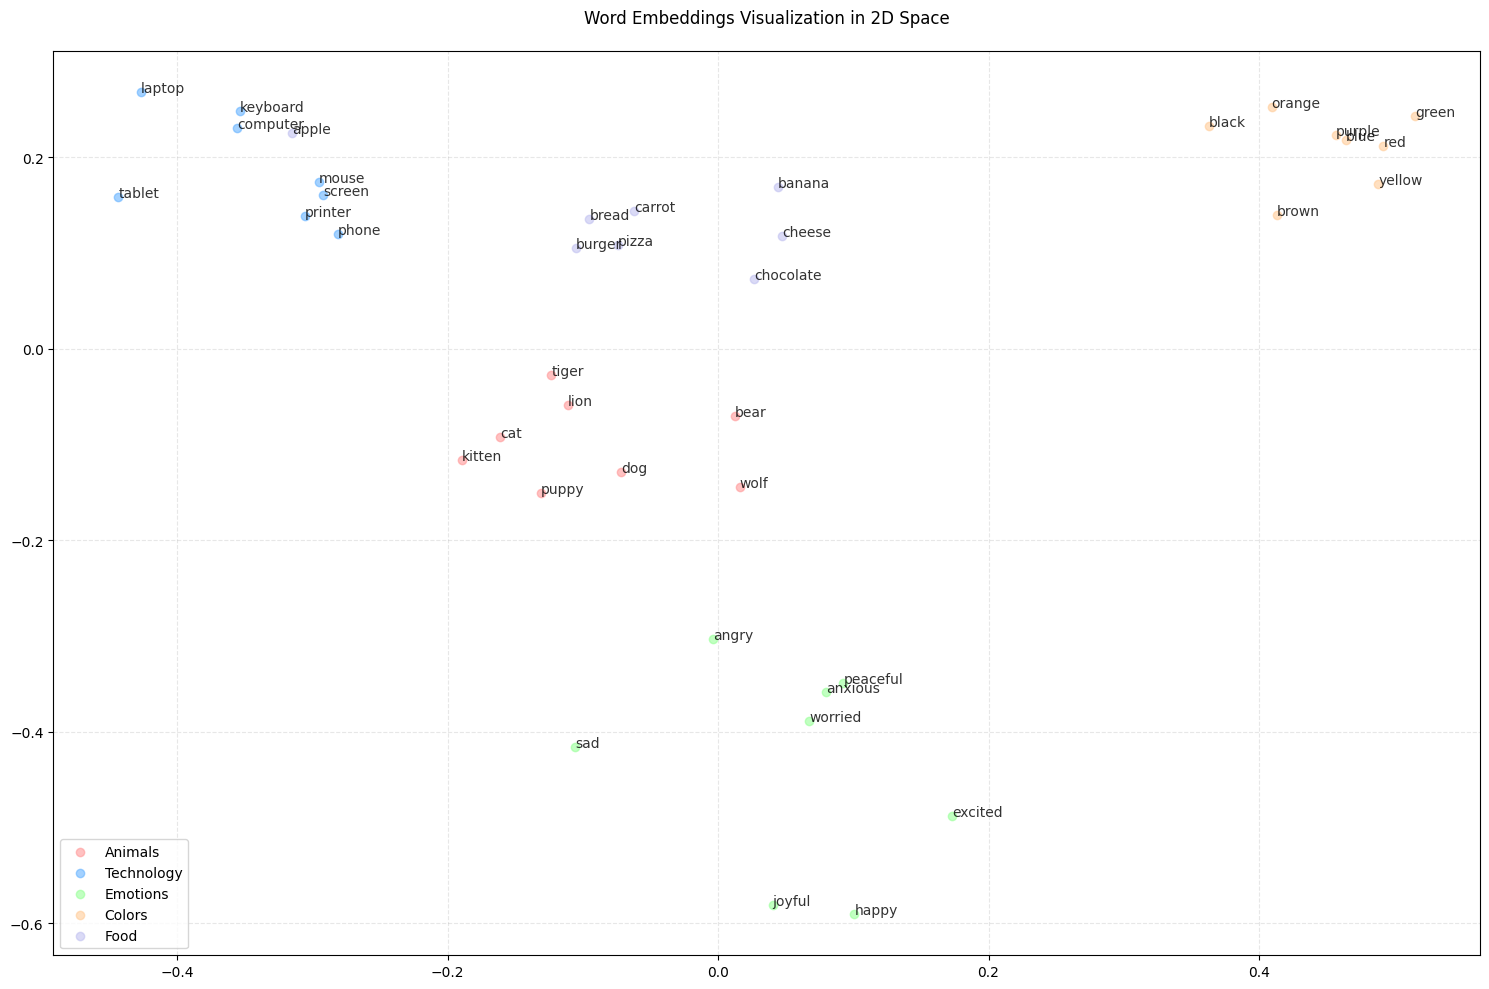

In [42]:
#
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample words in different semantic categories
words = [
    # Animals
    "dog", "cat", "puppy", "kitten", "bear", "lion", "tiger", "wolf",
    # Technology
    "computer", "laptop", "keyboard", "mouse", "phone", "tablet", "screen", "printer",
    # Emotions
    "happy", "sad", "joyful", "angry", "excited", "worried", "peaceful", "anxious",
    # Colors
    "red", "blue", "green", "yellow", "purple", "orange", "black", "brown",
     # Food
    "apple", "banana", "bread", "cheese", "carrot", "pizza", "chocolate", "burger"
]

# Get embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(words)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create visualization with a white background and black text
plt.figure(figsize=(15, 10), facecolor='white')

# Define colors for each category
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
categories = ['Animals', 'Technology', 'Emotions', 'Colors', 'Food']

# Plot each category with different colors
for i, category in enumerate(categories):
    start_idx = i * 8
    end_idx = start_idx + 8
    plt.scatter(embeddings_2d[start_idx:end_idx, 0], 
               embeddings_2d[start_idx:end_idx, 1], 
               alpha=0.6, 
               color=colors[i],
               label=category)

# Add word labels with black color
for i, word in enumerate(words):
    plt.annotate(word, 
                (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                fontsize=10,
                color='black',
                alpha=0.8)

plt.title("Word Embeddings Visualization in 2D Space", pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## 3.2 Vector Similarity Metrics

In [53]:
import torch
from sentence_transformers import SentenceTransformer, util

# Instantiate a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode sentences
sentences = [
    "Some kids are playing soccer",
    "There's a football match over there",
    "The house is too cold"
]
embeddings = model.encode(sentences, convert_to_tensor=True)

# Compute cosine similarity
cosine_similarity = util.cos_sim(embeddings[0], embeddings[1])
print(f"Cosine similarity between sentence 1 and 2: {cosine_similarity.item()}")

# Compute L2/Euclidean distance
cosine_similarity = util.pytorch_cos_sim(embeddings[0], embeddings[2])
print(f"L2 distance between sentence 1 and 3: {cosine_similarity.item()}")

# Compute dot product
cosine_similarity = torch.dot(embeddings[1], embeddings[2])
print(f"Dot product between sentence 2 and 3: {cosine_similarity.item()}")
    

Cosine similarity between sentence 1 and 2: 0.21995750069618225
L2 distance between sentence 1 and 3: -0.07688362896442413
Dot product between sentence 2 and 3: 0.05566840618848801


In [54]:
%pip -q install sentence-transformers huggingface-hub
%pip -q install nbformat>=4.2.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 3.3 Vector Search

In [55]:
%pip -q install sentence-transformers pandas faiss-cpu annoy hnswlib torch torchvision torchaudio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [69]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import faiss
from annoy import AnnoyIndex
import hnswlib
import time

# Load dataset
dataset_url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv"
df = pd.read_csv(dataset_url)
df = df.head(5000)  # Limit dataset size to simulate scale

# Preprocess titles
def preprocess_title(title):
    return ''.join(c.lower() if c.isalnum() or c.isspace() else '' for c in title)

df['cleaned_title'] = df['title'].apply(preprocess_title)

# Encode embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['cleaned_title'].tolist(), convert_to_tensor=True)

# Query
query_title = "Harry Potter and the Philosopher's Stone"
query_embedding = model.encode(preprocess_title(query_title), convert_to_tensor=True)

# Brute-force (Cosine Similarity)
start = time.time()
cosine_similarities = util.cos_sim(query_embedding, embeddings).flatten()
brute_force_cosine_indices = cosine_similarities.argsort(descending=True)[:5].tolist()
cosine_time = time.time() - start
cosine_results = [(df.iloc[idx]['title'], cosine_similarities[idx].item()) for idx in brute_force_cosine_indices]

# FAISS (L2 Distance)
faiss_index = faiss.IndexFlatL2(embeddings.shape[1])
faiss_index.add(embeddings.cpu().numpy())
start = time.time()
distances, faiss_indices = faiss_index.search(query_embedding.cpu().numpy().reshape(1, -1), 5)
faiss_time = time.time() - start
faiss_results = [(df.iloc[idx]['title'], distances[0][i]) for i, idx in enumerate(faiss_indices[0])]

# Annoy (Angular Distance)
annoy_index = AnnoyIndex(embeddings.shape[1], 'angular')
for i, embedding in enumerate(embeddings.cpu().numpy()):
    annoy_index.add_item(i, embedding)
annoy_index.build(10)
start = time.time()
annoy_indices = annoy_index.get_nns_by_vector(query_embedding.cpu().numpy(), 5, include_distances=True)
annoy_time = time.time() - start
annoy_results = [(df.iloc[idx]['title'], annoy_indices[1][i]) for i, idx in enumerate(annoy_indices[0])]

# HNSWlib (Cosine Distance)
hnsw_index = hnswlib.Index(space='cosine', dim=embeddings.shape[1])
hnsw_index.init_index(max_elements=len(df), ef_construction=200, M=16)
hnsw_index.add_items(embeddings.cpu().numpy())
start = time.time()
hnsw_indices, hnsw_distances = hnsw_index.knn_query(query_embedding.cpu().numpy(), k=5)
hnsw_time = time.time() - start
hnsw_results = [(df.iloc[idx]['title'], hnsw_distances[0][i]) for i, idx in enumerate(hnsw_indices[0])]

# Print results
print(f"Query: {query_title}\n")
print("=== Brute-Force (Cosine Similarity) ===")
print(f"Execution Time: {cosine_time:.4f} seconds")
for title, score in cosine_results:
    print(f"Title: {title} - Similarity: {score:.4f}")

print("\n=== FAISS (L2 Distance) ===")
print(f"Execution Time: {faiss_time:.4f} seconds")
for title, distance in faiss_results:
    print(f"Title: {title} - Distance: {distance:.4f}")

print("\n=== Annoy (Angular Distance) ===")
print(f"Execution Time: {annoy_time:.4f} seconds")
for title, distance in annoy_results:
    print(f"Title: {title} - Distance: {distance:.4f}")

print("\n=== HNSWlib (Cosine Distance) ===")
print(f"Execution Time: {hnsw_time:.4f} seconds")
for title, distance in hnsw_results:
    print(f"Title: {title} - Distance: {distance:.4f}")


Query: Harry Potter and the Philosopher's Stone

=== Brute-Force (Cosine Similarity) ===
Execution Time: 0.7020 seconds
Title: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) - Similarity: 0.7676
Title: The Stone Diaries - Similarity: 0.6533
Title: Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) - Similarity: 0.6490
Title: Harry Potter and the Goblet of Fire (Harry Potter, #4) - Similarity: 0.6463
Title: Harry Potter: Film Wizardry - Similarity: 0.6460

=== FAISS (L2 Distance) ===
Execution Time: 0.0008 seconds
Title: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) - Distance: 0.4649
Title: The Stone Diaries - Distance: 0.6935
Title: Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) - Distance: 0.7020
Title: Harry Potter and the Goblet of Fire (Harry Potter, #4) - Distance: 0.7075
Title: Harry Potter: Film Wizardry - Distance: 0.7080

=== Annoy (Angular Distance) ===
Execution Time: 0.0009 seconds
Title: Harry Potter and the Sorcerer's Stone (Har

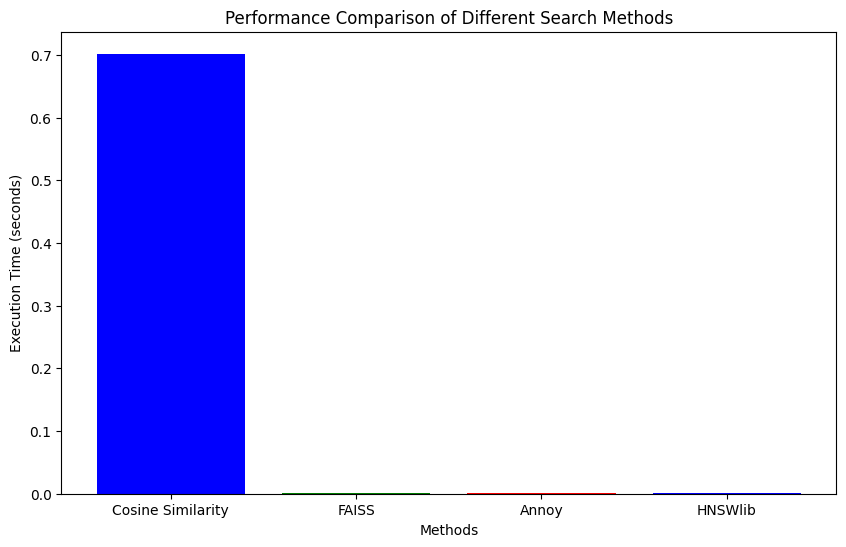

In [71]:
import matplotlib.pyplot as plt

# Execution times
methods = ['Cosine Similarity', 'FAISS', 'Annoy', 'HNSWlib']
times = [cosine_time, faiss_time, annoy_time, hnsw_time]

# Plotting the execution times
plt.figure(figsize=(10, 6))
plt.bar(methods, times, color=['blue', 'green', 'red'])
plt.xlabel('Methods')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Different Search Methods')
plt.show()
